In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import random

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

print("Path to dataset files:", path)

100%|██████████| 185M/185M [00:08<00:00, 22.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/versions/5


In [3]:
!ls /root/.cache/kagglehub/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/versions/5

'A_Z Handwritten Data'	'A_Z Handwritten Data.csv'


In [5]:
# Map integers to character labels (0-25 -> A-Z)
label_to_char = {i: chr(65 + i) for i in range(26)}

# Load and preprocess the dataset
data = pd.read_csv("/root/.cache/kagglehub/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/versions/5/A_Z Handwritten Data.csv")

# Separate features and labels
X = data.drop("0", axis=1).values  # Pixel values
y = data["0"].values               # Labels (0-25 for A-Z)


# Normalize pixel values to [0, 1]
X = X / 255.0

# Reshape X for neural network input
X = X.reshape(-1, 28, 28, 1)  # -1 infers number of images, 28x28 pixels, 1 channel (grayscale)

# One-hot encode labels
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

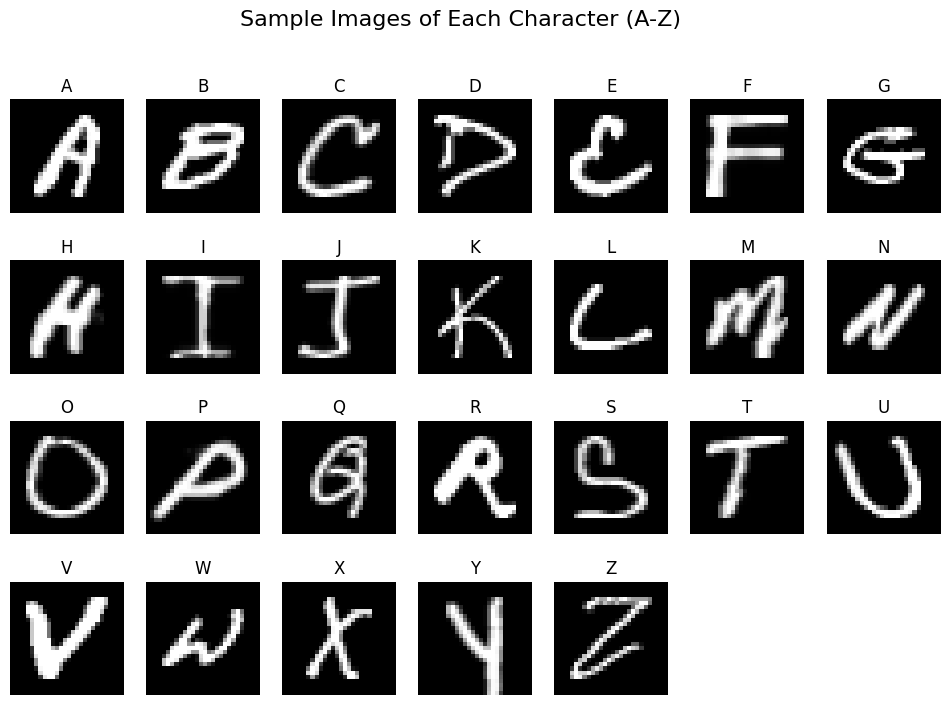

In [6]:
# Visualize sample images for each character
def visualize_dataset_samples(X, y):
    plt.figure(figsize=(12, 8))
    for i in range(26):
        index = np.where(np.argmax(y, axis=1) == i)[0][0]
        img = X[index].reshape(28, 28)
        plt.subplot(4, 7, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(label_to_char[i])
        plt.axis('off')
    plt.suptitle("Sample Images of Each Character (A-Z)", fontsize=16)
    plt.show()

# Display dataset sample images
visualize_dataset_samples(X, y)

In [9]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')  # 26 output classes for A-Z
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and record the training process
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)


Epoch 1/20
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8341 - loss: 0.6173 - val_accuracy: 0.9511 - val_loss: 0.1787
Epoch 2/20
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9577 - loss: 0.1536 - val_accuracy: 0.9634 - val_loss: 0.1286
Epoch 3/20
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9685 - loss: 0.1106 - val_accuracy: 0.9694 - val_loss: 0.1087
Epoch 4/20
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9743 - loss: 0.0897 - val_accuracy: 0.9711 - val_loss: 0.1017
Epoch 5/20
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9782 - loss: 0.0747 - val_accuracy: 0.9741 - val_loss: 0.0921
Epoch 6/20
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9810 - loss: 0.0647 - val_accuracy: 0.9739 - val_loss: 0.0902
Epoch 7/20
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9831 - loss: 0.0555 - val_accuracy: 0.9777 - val_loss: 0.0822
Epoch 8/20
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9851 - loss: 0

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0691
Test Accuracy: 0.99


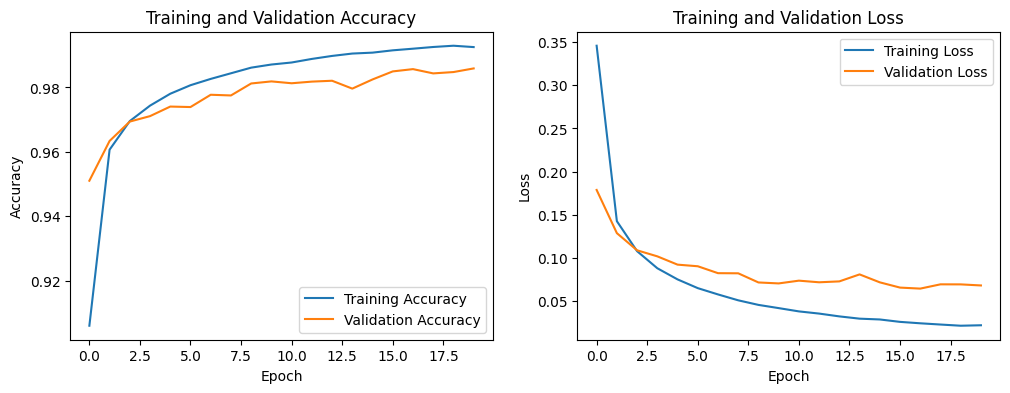

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


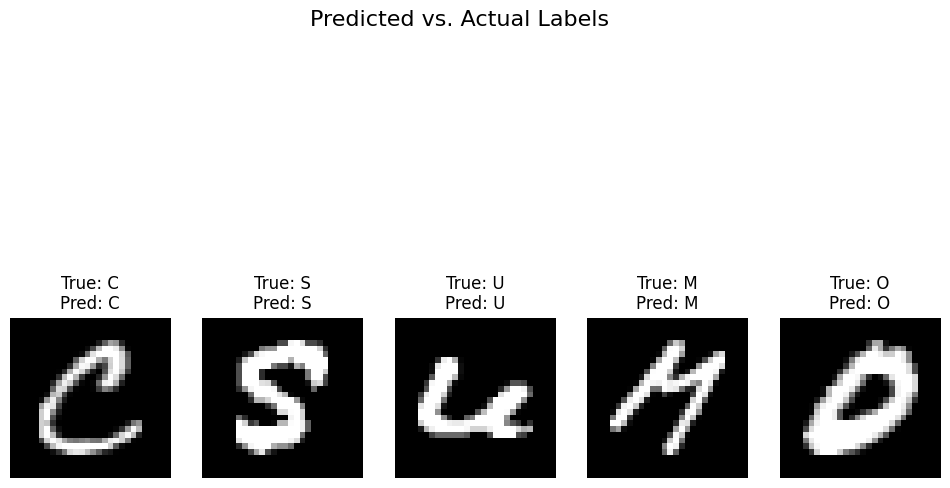

In [10]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training & validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Visualize some predictions compared to actual labels
def visualize_predictions(X_test, y_test, model, num_samples=5):
    plt.figure(figsize=(12, 8))
    for i in range(num_samples):
        idx = random.randint(0, len(X_test) - 1)
        img = X_test[idx].reshape(28, 28)

        # True and predicted labels
        true_label = np.argmax(y_test[idx])
        pred_label = np.argmax(model.predict(X_test[idx:idx+1]))

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {label_to_char[true_label]}\nPred: {label_to_char[pred_label]}")
        plt.axis('off')
    plt.suptitle("Predicted vs. Actual Labels", fontsize=16)
    plt.show()

# Visualize predictions
visualize_predictions(X_test, y_test, model)